# Sentiment  Analysis E-Commerce (Naive-Bayes)

In [1]:
%pip install pandas
%pip install matplotlib
%pip install Sastrawi
%pip install wordcloud
%pip install numpy
%pip install sckit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


# 1. Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

# 2. Crawling Data

In [3]:
df = pd.read_csv('C:/Users/Fitra/Documents/Sentiment_E-Commerce/dataset/data_real.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [4]:
df_copy = df.copy()

# 3. Labelling

In [5]:
label = []
for index, row in df_copy.iterrows():
    if row["Rating"] == 1 or row["Rating"] == 2:
        label.append(0)
    else :
        label.append(1)
    
df_copy["label"] = label

In [6]:
df_copy.head()

,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# 4. Preprocessing Text

In [7]:
df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()

In [8]:
df_copy.head()

,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,0,59,pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# 5. Normalization

In [9]:
norm = {
    'trims': 'terima kasih',
    'brg': 'barang',
    'gxx`': 'tidak',
    'dgn': 'dengan',
    'recommended': 'rekomendasi',
    'recomend': 'rekomendasi',
    'good': 'bagus',
    'tdk': 'tidak',
    'gak': 'tidak',
    'ga': 'tidak',
    'udh': 'sudah',
    'dah': 'sudah',
    'bgt': 'banget',
    'sy': 'saya',
    'ane': 'saya',
    'sm': 'sama',
    'aja': 'saja',
    'bgus': 'bagus',
    'trs': 'terus',
    'ok': 'oke',
    'oke': 'oke',
    'okey': 'oke',
    'mantap': 'bagus',
    'mantul': 'mantap betul',
    'gpp': 'tidak apa-apa',
    'klo': 'kalau',
    'kmrn': 'kemarin',
    'hr': 'hari',
    'mlm': 'malam',
    'pagi2': 'pagi-pagi',
    'siang2': 'siang-siang',
    'pas': 'cocok',
    'murce': 'murah',
    'btw': 'ngomong-ngomong',
    'coz': 'karena',
    'cos': 'karena',
    'thx': 'terima kasih',
    'ty': 'terima kasih',
    'sip': 'baik',
    'yup': 'iya',
    'ya': 'iya',
    'iy': 'iya',
    'iyah': 'iya',
    'om': 'bapak',
    'gan': 'mas',
    'bro': 'teman',
    'sis': 'kakak',
    'bgt': 'banget',
    'cpt': 'cepat',
}

def normalization(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: normalization(x))

In [10]:
df_copy.head()

,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,0,59,pesanan gx sesuai dentidakn yg d tidakmbar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,3,117,"php, bilang isi ada diseskripsi cocok dipesen ...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,4,153,barang jelek copot&#34; terus tmpat taro isiniyaa,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# 6. Stop Word

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = []
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    return stop_words_remover_new.remove(str_text)

df_copy = df.copy()
df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(str(x)) if pd.notnull(x) else x)
df_copy.head()


,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,1,70,Pengiriman respon super cepat. Tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,3,117,"Php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# 7. Tokenize

In [12]:
tokenized = df_copy['Ulasan'].apply(lambda x:x.split())
tokenized

0               [Pesanan, gx, sesuai, dgn, yg, d, gambar]
1       [Pengiriman, respon, super, cepat., Tpi, baran...
2                  [barang, yg, dikirim, sesuai, pesanan]
3       [Php,, bilang, isi, diseskripsi, pas, dipesen,...
4       [barang, jelek, copot&#34;, terus, tmpat, taro...
                              ...                        
1920           [Bagus, memuaskan., Packing, bagus, cepat]
1921              [Mantap, pengiriman, cepat, recomended]
1922                        [Pengiriman, cepat., Lumayan]
1923              [belom, dicoba, semoga, oke, barangnya]
1924    [Barang, cukup, bagus,, Respon, bagus., Tapi, ...
Name: Ulasan, Length: 1925, dtype: object

# 8. Stemming

In [13]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Ulasan:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ". join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("C:/Users/Fitra/Documents/Sentiment_E-Commerce/stemming data/databaersih.csv", index=False)
data_clean = pd.read_csv("C:/Users/Fitra/Documents/Sentiment_E-Commerce/stemming data/databaersih.csv", encoding='latin1')
data_clean.head()

pesan gx sesuai dgn yg d gambar
kirim respon super cepat tpi barang sesuai gambar tidak kuat tembus jok motor
barang yg kirim sesuai pesan
php bilang isi skripsi pas sen beda mubajir rp50 000 nyata isi ga cocok
barang jelek copot 34 terus tmpat taro isi
beli staples gak jual isi sekali pake ckckck
baik kalau mau ngirim barang periksa dulu gan kondisi barang layak apa gak gitu loh isi karat semua
produk sesuai order prohex yg kirim
brg sdh terima
bisa buat masang jok gak pake
barang datang cacat gak guna harus sblum kirim di coba dulu
kecewa baru dipakey isiya kluar 2 3 buah papan nempel
barang kurang bagus kirim pakai pos lama sekali
hasil staples rapat bidang mungkin produk cacat hadeeuh
barang standart n biasa aja kurang good
barang rusak kecewa berat
beli 5 tdk bs pakai semua
straples nya gk bs dipake udh coba berkali2 bwt pasang jaring nyamuk straples tembak bah triplek aja gk nembus udh harus diketok2 palu lgi 
mungkin harga juga jadi susah dipake hehe staples gak nancep sampe oen

,Ulasan
0,pesan gx sesuai dgn yg d gambar
1,kirim respon super cepat tpi barang sesuai gam...
2,barang yg kirim sesuai pesan
3,php bilang isi skripsi pas sen beda mubajir rp...
4,barang jelek copot 34 terus tmpat taro isi


In [14]:
data_clean.head()

,Ulasan
0,pesan gx sesuai dgn yg d gambar
1,kirim respon super cepat tpi barang sesuai gam...
2,barang yg kirim sesuai pesan
3,php bilang isi skripsi pas sen beda mubajir rp...
4,barang jelek copot 34 terus tmpat taro isi


# 9. Combines Both Attributes

In [15]:
at1 = pd.read_csv ("C:/Users/Fitra/Documents/Sentiment_E-Commerce/stemming data/databaersih.csv")
at2 = pd.read_csv ("C:/Users/Fitra/Documents/Sentiment_E-Commerce/dataset/data_real.csv")
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [16]:
result.head()

,Ulasan,label
0,pesan gx sesuai dgn yg d gambar,0
1,kirim respon super cepat tpi barang sesuai gam...,0
2,barang yg kirim sesuai pesan,0
3,php bilang isi skripsi pas sen beda mubajir rp...,0
4,barang jelek copot 34 terus tmpat taro isi,0


# 10. Counting Words Using TF-IDF

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [18]:
Ulasan = result['Ulasan']

In [19]:
Ulasan.isnull().sum()

6

In [20]:
Ulasan = Ulasan.fillna('no comment')

In [21]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

2875


In [22]:
term_fit.vocabulary_

{'pesan': 1994,
 'gx': 1005,
 'sesuai': 2336,
 'dgn': 723,
 'yg': 2862,
 'gambar': 921,
 'kirim': 1319,
 'respon': 2175,
 'super': 2510,
 'cepat': 572,
 'tpi': 2703,
 'barang': 302,
 'tidak': 2649,
 'kuat': 1389,
 'tembus': 2589,
 'jok': 1181,
 'motor': 1685,
 'php': 2000,
 'bilang': 412,
 'isi': 1120,
 'skripsi': 2395,
 'pas': 1934,
 'sen': 2312,
 'beda': 352,
 'mubajir': 1697,
 'rp50': 2205,
 '000': 1,
 'nyata': 1832,
 'ga': 907,
 'cocok': 602,
 'jelek': 1162,
 'copot': 621,
 '34': 69,
 'terus': 2613,
 'tmpat': 2676,
 'taro': 2563,
 'beli': 363,
 'staples': 2467,
 'gak': 918,
 'jual': 1188,
 'sekali': 2288,
 'pake': 1912,
 'ckckck': 588,
 'baik': 278,
 'kalau': 1218,
 'mau': 1598,
 'ngirim': 1778,
 'periksa': 1988,
 'dulu': 825,
 'gan': 926,
 'kondisi': 1358,
 'layak': 1439,
 'apa': 218,
 'gitu': 964,
 'loh': 1491,
 'karat': 1238,
 'semua': 2311,
 'produk': 2062,
 'order': 1876,
 'prohex': 2066,
 'brg': 471,
 'sdh': 2268,
 'terima': 2605,
 'bisa': 416,
 'buat': 491,
 'masang': 1588,


In [23]:
term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

  (0, 723)	1
  (0, 921)	1
  (0, 1005)	1
  (0, 1994)	1
  (0, 2336)	1
  (0, 2862)	1
  (1, 302)	1
  (1, 572)	1
  (1, 921)	1
  (1, 1181)	1
  (1, 1319)	1
  (1, 1389)	1
  (1, 1685)	1
  (1, 2175)	1
  (1, 2336)	1
  (1, 2510)	1
  (1, 2589)	1
  (1, 2649)	1
  (1, 2703)	1
  (2, 302)	1
  (2, 1319)	1
  (2, 1994)	1
  (2, 2336)	1
  (2, 2862)	1
  (3, 1)	1
  :	:
  (1924, 742)	1
  (1924, 905)	1
  (1924, 918)	2
  (1924, 926)	1
  (1924, 966)	1
  (1924, 1000)	1
  (1924, 1038)	1
  (1924, 1469)	1
  (1924, 1579)	1
  (1924, 1721)	1
  (1924, 1811)	1
  (1924, 1916)	1
  (1924, 1937)	1
  (1924, 2007)	1
  (1924, 2175)	1
  (1924, 2244)	1
  (1924, 2268)	1
  (1924, 2299)	1
  (1924, 2385)	1
  (1924, 2526)	3
  (1924, 2562)	1
  (1924, 2588)	1
  (1924, 2666)	1
  (1924, 2702)	1
  (1924, 2792)	1


In [24]:
ulasan_tf = Ulasan[1]
print(ulasan_tf)

kirim respon super cepat tpi barang sesuai gambar tidak kuat tembus jok motor


In [25]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)

  (0, 302)	1
  (0, 572)	1
  (0, 921)	1
  (0, 1181)	1
  (0, 1319)	1
  (0, 1389)	1
  (0, 1685)	1
  (0, 2175)	1
  (0, 2336)	1
  (0, 2510)	1
  (0, 2589)	1
  (0, 2649)	1
  (0, 2703)	1


In [26]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.87005341 7.87005341 7.87005341 ... 7.87005341 7.87005341 7.87005341]
  (0, 302)	0.10432909207446783
  (0, 572)	0.1674652084405158
  (0, 921)	0.22685986549289416
  (0, 1181)	0.3951298357482066
  (0, 1319)	0.14925598919996602
  (0, 1389)	0.3123217516528584
  (0, 1685)	0.3951298357482066
  (0, 2175)	0.19978220735207883
  (0, 2336)	0.13259306240524601
  (0, 2510)	0.3261580518034119
  (0, 2589)	0.3951298357482066
  (0, 2649)	0.22015975149120523
  (0, 2703)	0.3302381205574495


# 11. Visualization (NLP)

In [27]:
train_s0 = df_copy[df_copy["label"] == 0]

In [28]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("no comment")

C:\Users\Fitra\AppData\Local\Temp\ipykernel_31260\3055824175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan"] = train_s0["Ulasan"].fillna("no comment")


In [29]:
train_s0.head()

,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,1,70,Pengiriman respon super cepat. Tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,3,117,"Php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [30]:
from wordcloud import WordCloud

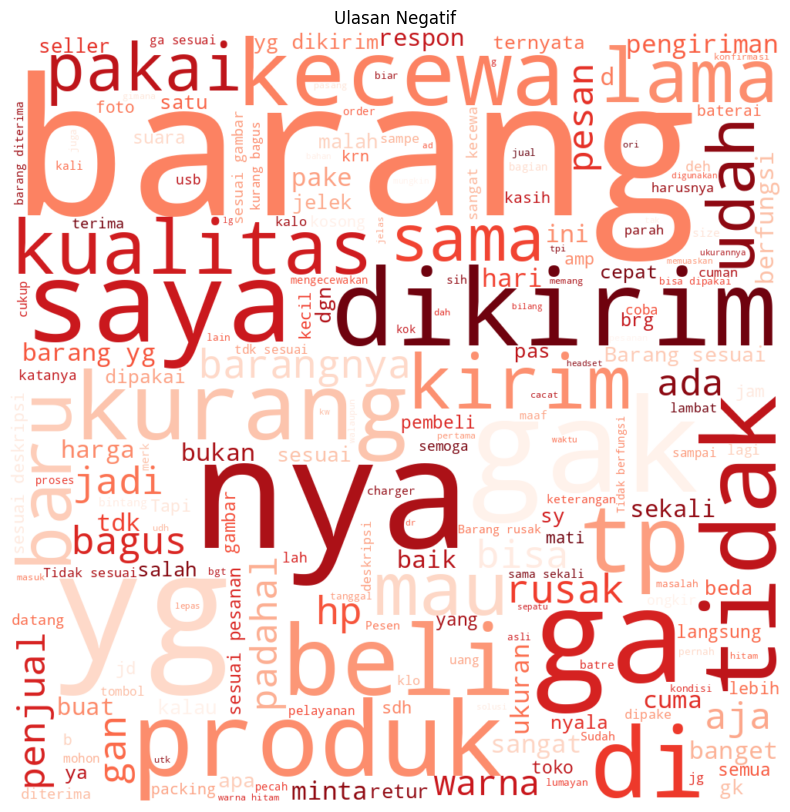

In [31]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [32]:
train_s1 = df_copy[df_copy["label"] == 1]

In [33]:
train_s1["Ulasan"] = train_s1["Ulasan"].fillna("no comment")

C:\Users\Fitra\AppData\Local\Temp\ipykernel_31260\4178809962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan"] = train_s1["Ulasan"].fillna("no comment")


In [34]:
train_s1.head()

,Unnamed: 0.1,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
925,0,1,Barang sesuai pesanan cepat,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,1
926,1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
927,2,3,Paket rapi...mantap....cepat....sampe tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
928,3,4,saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,1
929,4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,1


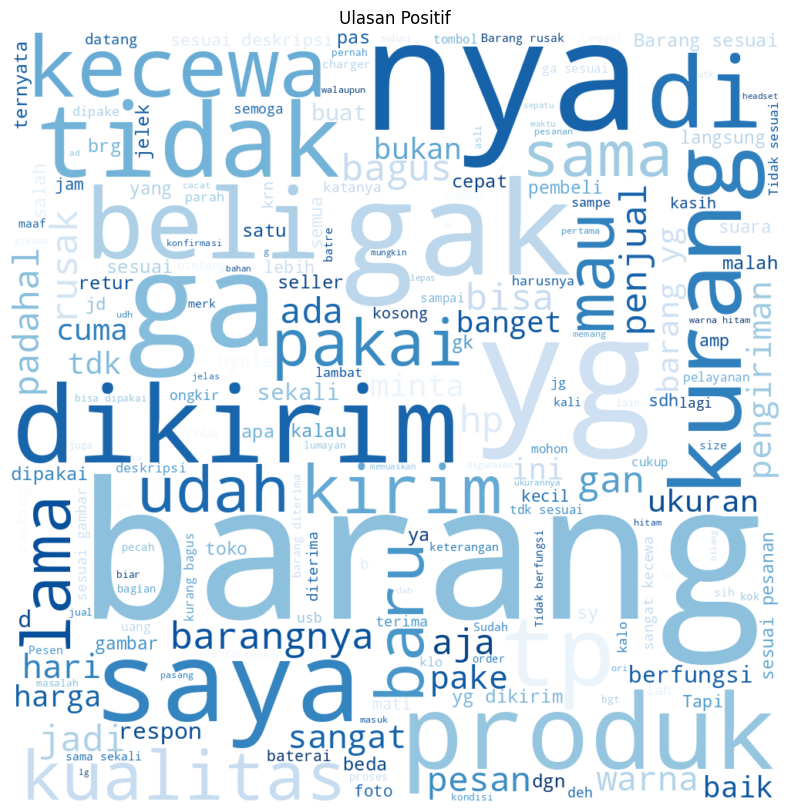

In [35]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

C:\Users\Fitra\AppData\Local\Temp\ipykernel_31260\1423334625.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

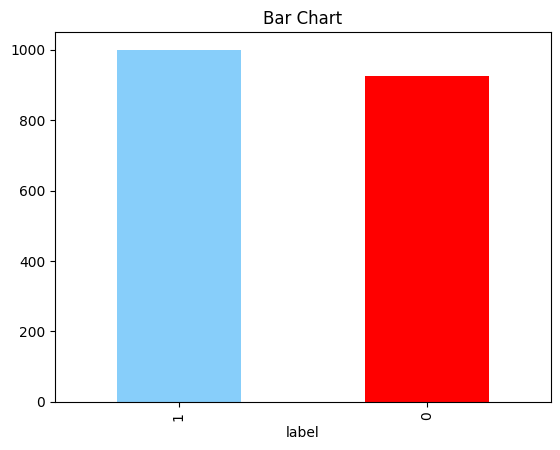

In [36]:
sentimen_data = pd.value_counts(df_copy["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show

# 12 Split Data (TF-IDF)

In [37]:
result['Ulasan'] = result['Ulasan'].fillna("no comment")

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result['Ulasan'], result['label'],
                                                    test_size=0.1, stratify=result['label'], random_state=30)

In [39]:
import numpy as np

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [41]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1732, 2737)
(193, 2737)


In [42]:
X_train = X_train.toarray()

In [43]:
X_test = X_test.toarray()

# 13. Machine Learning (Naive Bayes Classifier)

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
import numpy as np

nb = GaussianNB()
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}

gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1,
                        scoring='accuracy')

gscv_nb.fit(X_train, y_train)

print("Best parameters:", gscv_nb.best_params_)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Best parameters: {'var_smoothing': 0.006579332246575682}


In [46]:
nb = GaussianNB(var_smoothing=0.006579332246575682)

In [47]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.006579332246575682)

In [48]:
y_pred_nb = nb.predict(X_test)

# 14. Confusion Matrix

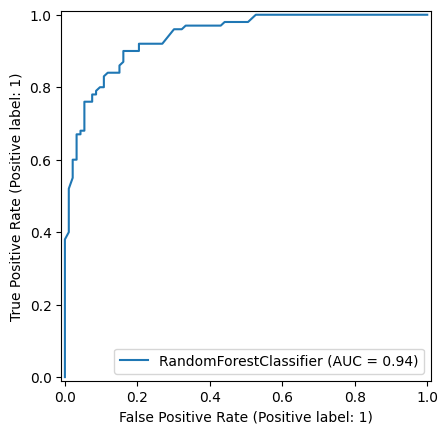

Confusion Matrix:
[[79 14]
 [16 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        93
           1       0.86      0.84      0.85       100

    accuracy                           0.84       193
   macro avg       0.84      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193


AUC: 0.9395698924731183


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, RocCurveDisplay, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("\nAUC:", roc_auc)


In [58]:
print('----- confusion matrix -----')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix -----
[[74 19]
 [ 9 91]]
----- classification report -----
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        93
           1       0.83      0.91      0.87       100

    accuracy                           0.85       193
   macro avg       0.86      0.85      0.85       193
weighted avg       0.86      0.85      0.85       193



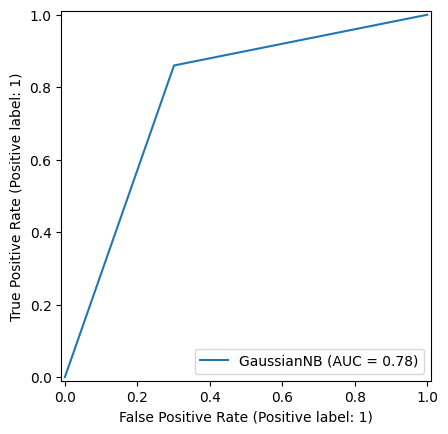

In [61]:
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


nb = GaussianNB()
nb.fit(X_train, y_train)

RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.show()
